# NSL Notebook 11

## Exercise 11.1

In [1]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Create Layers
model = Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(1))
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Target parameters of f(x) = m*x + b
m = 2
b = 1

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.0
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

In [4]:
# Fit the model using training dataset
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 10ms/step - loss: 2.4699 - mse: 2.4699 - val_loss: 1.9810 - val_mse: 1.9810
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 1.5931 - mse: 1.5931 - val_loss: 1.5879 - val_mse: 1.5879
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 1.2835 - mse: 1.2835 - val_loss: 1.2682 - val_mse: 1.2682
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.8975 - mse: 0.8975 - val_loss: 0.6930 - val_mse: 0.6930
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3389 - mse: 0.3389 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 1.5814e-04 - val_mse: 1.5814e-04
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 3.8854e-0

In [5]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

4/4 [==============================] - 0s 7ms/step - loss: 1.7168e-12 - mse: 1.7168e-12

Test loss: 1.7168462831951281e-12


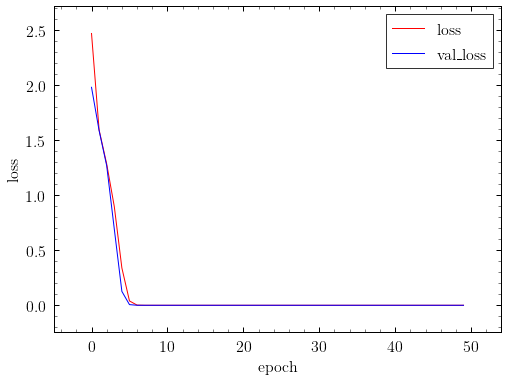

In [6]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

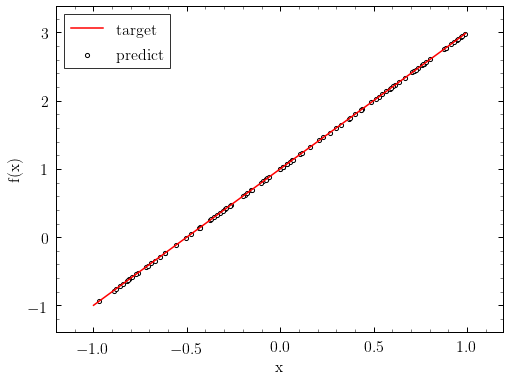

In [7]:
fig, ax = plt.subplots(figsize=(8,6));

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

ax.scatter(x_predicted, y_predicted, color='k', marker='o', facecolors="w", s=17, label='predict');
ax.plot(x_valid, y_target, 'r-', lw=1.5, label='target');

ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('f(x)');

## Exercise 11.2

In [2]:
# Create Layers
model_p = Sequential()
model_p.add(Dense(100, input_shape=(1,), activation='relu'))
model_p.add(Dense(66, activation='relu'))
model_p.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model_p.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model_p.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 67        
Total params: 6,933
Trainable params: 6,933
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Target parameters of f(x) = 4 - 3*x - 2*x^2 + 3*x^3
a = 4
b = -3
c = -2
d = 3

pol = lambda x: a + b * x + c * x**2 + d * x**3

# Generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, int(1e4))
x_tail = np.random.uniform(0.7, 1, int(3e3))
x_train = np.concatenate((x_train,x_tail), axis=None)
x_valid = np.random.uniform(-1, 1, int(1e3))
x_tail = np.random.uniform(0.7, 1, int(3e2))
x_valid = np.concatenate((x_valid,x_tail), axis=None)
x_valid.sort()
y_target = pol(x_valid)

sigma = 0.0
y_train = np.random.normal(pol(x_train), sigma)
y_valid = np.random.normal(pol(x_valid), sigma)

In [4]:
# Fit the model using training dataset
history = model_p.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

Epoch 1/50
407/407 [==============================] - 1s 2ms/step - loss: 0.4941 - mse: 0.4941 - val_loss: 0.1512 - val_mse: 0.1512
Epoch 2/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0875 - mse: 0.0875 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 3/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 4/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 5/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 6/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 7/50
407/407 [==============================] - 1s 2ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 8/50
407/407 [==============================] - 1s 2ms/step - loss: 0.

In [5]:
# evaluate model
score = model_p.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

32/32 [==============================] - 0s 7ms/step - loss: 5.0355e-04 - mse: 5.0355e-04

Test loss: 0.0005035516223870218


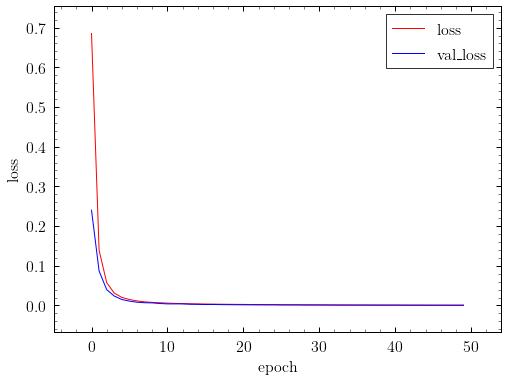

In [6]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

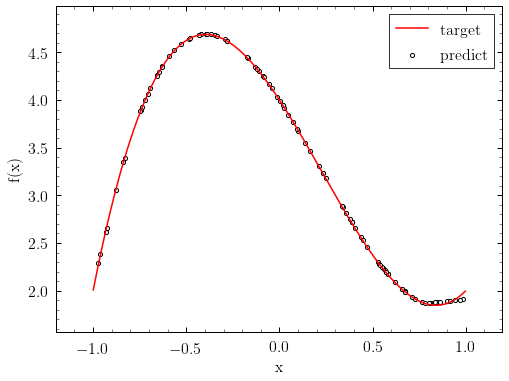

In [5]:
fig, ax = plt.subplots(figsize=(8,6));

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_p.predict(x_predicted)

ax.scatter(x_predicted, y_predicted, color='k', marker='o', facecolors="w", s=17, label='predict');
ax.plot(x_valid, y_target, 'r-', lw=1.5, label='target');

ax.legend()
ax.set_xlabel('x');
ax.set_ylabel('f(x)');

## Exercise 11.3

In [2]:
# Create Layers
model_2 = Sequential()
model_2.add(Dense(100, input_shape=(2,), activation='relu'))
model_2.add(Dense(66, activation='relu'))
model_2.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Get a summary of our composed model
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 67        
Total params: 7,033
Trainable params: 7,033
Non-trainable params: 0
_________________________________________________________________


In [3]:
# f(x,y) = sin(x^2 + y^2)

sin_2 = lambda xy: np.sin(xy.T[0]**2 + xy.T[1]**2)

# Generate training inputs
np.random.seed(0)
xy_train = np.random.uniform(-3/2, 3/2, size=(int(1e4),2))
xy_valid = np.random.uniform(-3/2, 3/2, size=(int(1e4),2))
z_target = sin_2(xy_valid)

sigma = 0.0
z_train = np.random.normal(sin_2(xy_train), sigma)
z_valid = np.random.normal(sin_2(xy_valid), sigma)

In [4]:
# Fit the model using training dataset
history = model_2.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=50,
          validation_data=(xy_valid, z_valid))

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1295 - mse: 0.1295 - val_loss: 0.1187 - val_mse: 0.1187
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1115 - mse: 0.1115 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1041 - mse: 0.1041 - val_loss: 0.0970 - val_mse: 0.0970
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0965 - mse: 0.0965 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 7/50
313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0821 - val_mse: 0.0821
Epoch 8/50
313/313 [==============================] - 1s 3ms/step - loss: 0.

In [5]:
# evaluate model
score = model_2.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])

313/313 [==============================] - 1s 2ms/step - loss: 5.0333e-04 - mse: 5.0333e-04

Test loss: 0.000503328163176775


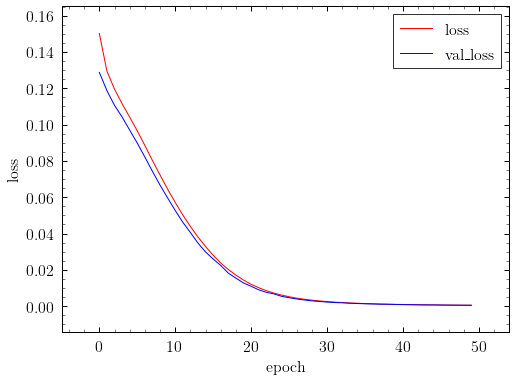

In [6]:
fig, ax = plt.subplots(figsize=(8,6));

df = pd.DataFrame(history.history)
df['loss'].plot.line(c='r', label='loss', ax=ax);
df['val_loss'].plot.line(c='b', label='val\_loss', ax=ax);

ax.legend()
ax.set_xlabel('epoch');
ax.set_ylabel('loss');

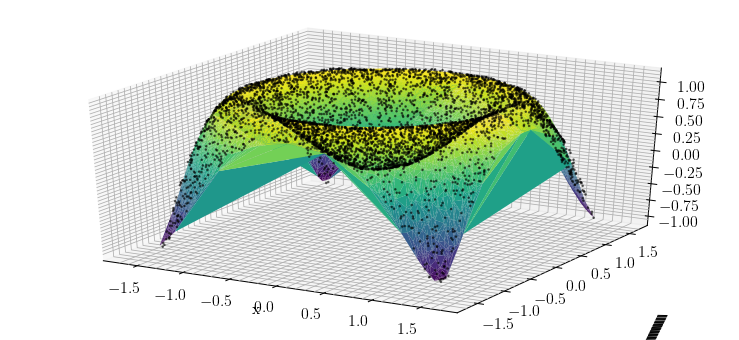

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xy_predicted = np.random.uniform(-3/2, 3/2, size=(int(5e3),2))
z_predicted = model_2.predict(xy_predicted)

ax.scatter(xy_predicted.T[0], xy_predicted.T[1], z_predicted, color='k', alpha=0.5, marker='.', s=10);
ax.plot_trisurf(xy_valid.T[0], xy_valid.T[1], z_target, cmap='viridis', edgecolor='none');
